# Fraud detection using Machine Learning

# This project builds several models to classify credit card transactions as a fraud or non-fraud.
# This is the first version of the code and the main version for the project.

# Models Used:
# - Logistic Regression
# - Random Forest
# - XGBoost
# - Decision Tree

# Evaluation Metrics:
# - ROC AUC Score (primary metric)
# - Precision, Recall, F1-Score

In [1]:
#loading the data
import pandas as pd
data = pd.read_csv('creditcard.csv')

In [2]:
#view the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#check missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


Text(0.5, 1.0, 'Fraud transactions vs non-fraud transactions')

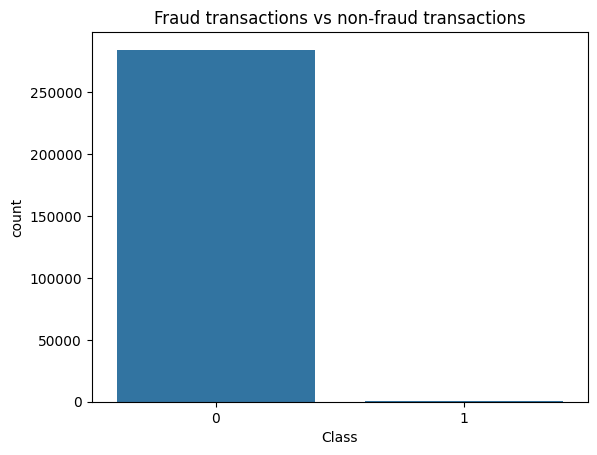

In [5]:
#check for balance and visualise it
print(data["Class"].value_counts())

import seaborn as sns
sns.countplot(x = "Class", data = data)
import matplotlib.pyplot as plt
plt.title("Fraud transactions vs non-fraud transactions")

In [6]:
#preprocess the data
#cant see the significance of time, so im dropping the time column
data = data.drop(["Time"],axis = 1)

#scale amount column using standard scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data["Amount"] = scale.fit_transform(data[["Amount"]])

In [7]:
#define the data
x = data.drop(["Class"], axis = 1)
y = data["Class"]

In [8]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state= 42, stratify= y)

LOGISTIC REGRESSION RESULTS:
Accuracy = 0.9761242661722985
Area under curve score = 0.9727238111447505
Confusion matrix = [[69393  1686]
 [   14   109]]


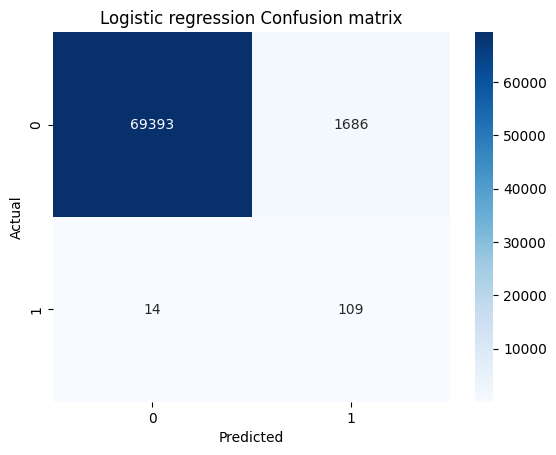

Logistic regression Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

RANDOM FOREST RESULTS:
Accuracy = 0.9995646189713772
Area under curve score = 0.9375143333588403
Confusion matrix = [[71074     5]
 [   26    97]]


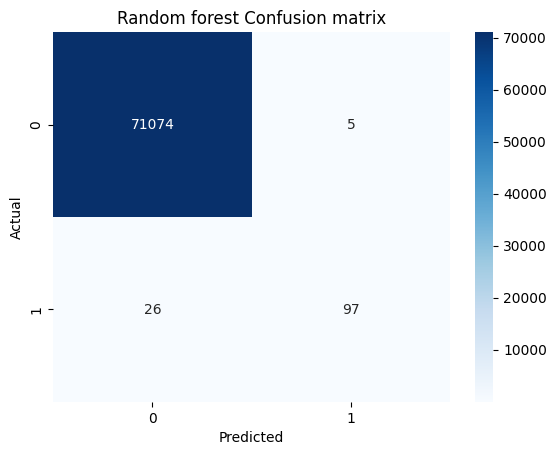

Random forest Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

XGBOOST RESULTS:
Accuracy = 0.9994241734782731
Area under curve score = 0.9425995374206897
Confusion matrix = [[71066    13]
 [   28    95]]


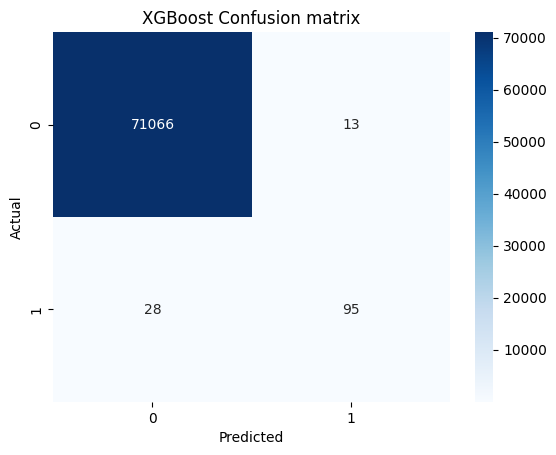

XGBoost Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.77      0.82       123

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202

DECISION TREE RESULTS:
Accuracy = 0.9990168815482711
Area under curve score = 0.8493613598610134
Confusion matrix = [[71046    33]
 [   37    86]]


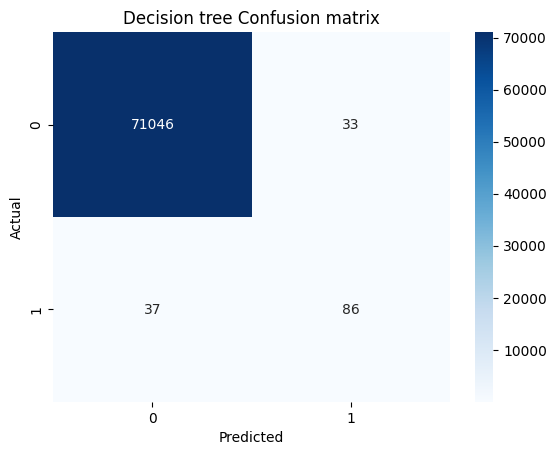

Decision tree Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.70      0.71       123

    accuracy                           1.00     71202
   macro avg       0.86      0.85      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [9]:
#way 1: 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

models = {"Logistic regression":LogisticRegression(max_iter= 1000, class_weight= "balanced"),
          "Random forest":RandomForestClassifier(),
          "XGBoost":XGBClassifier(),
          "Decision tree":DecisionTreeClassifier()}
for modelname,model in models.items():
    print(f"{modelname.upper()} RESULTS:")
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:,1] 
    accuracy = accuracy_score(y_test, y_predict)
    accuracy_roc = roc_auc_score(y_test, y_proba) #used roc cause accuracy is not the best for unbalanced data
    cm = confusion_matrix(y_test, y_predict)
    print(f"Accuracy = {accuracy}\nArea under curve score = {accuracy_roc}\nConfusion matrix = {cm}")
    
    #heat map to visualize the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{modelname} Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #showing the other evaluation metrics
    from sklearn.metrics import classification_report
    print(f"{modelname} Classification report:")
    print(classification_report(y_test, y_predict))

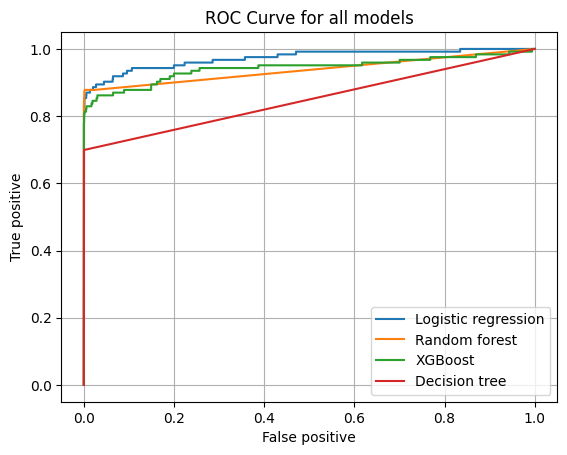

In [10]:
#drawing graphs for roc
from sklearn.metrics import roc_curve
for modelname,model in models.items():
    x_axis_fp, y_axis_tp, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.plot( x_axis_fp, y_axis_tp, label = modelname)
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC Curve for all models")
plt.legend()
plt.grid(True)
plt.show()

# conclusion
# In this project, I built a machine learning fraud detection system using credit card fraud dataset from kaggle. 
# The dataset presented a problem due to its extreme class imbalance, with fraud transactions being less than 0.2% of the entire data.
# I trained four models: Logistic regression, Decision tree, Random forest and XGBoost.
# To address the extreme imbalance in the dataset, I used stratified sampling when train-test spliting the data to make sure that both training and testing sets had the same proportion of fraud and non-fraud cases as the original dataset.
# To handle the imbalance further, I applied class weighting on Logistic regression model.
# The models were primarily assessed using the ROC-AUC score, precision, recall and F1-score rather than accuracy alone because accuracy alone would be misleading since the dataset is highly skewed(imbalanced).
# Amongst the models, XGBoost and Random Forest showed a strong performance by achieving high ROC-AUC scores and also balanced precision and recall values. Logistic regression with balanced class weights also performed competitively which can be added on to the benefit of interpretability.
# Despite strong performances, no model had a perfect fraud detection. For instance, the best models correctly identified approximately 74% of fraudulent transactions, which is good but it still leaves room for undetected fraud. This highlights the trade-off between catching fraud and avoiding false alarms in real-world applications.
# To further improve performance, future work will consider using other techniques.
# Overall, this small project shows that machine learning provides a valuable foundation for detecting fraud in real-time fraud prevention systems.